In [274]:
# Import dependencies
import pandas as pd
import numpy as np
from pca import pca

# Visualization frameworks
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# Sklearn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

# Scipys stuff
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# Loading the necessary data
Arrest_df = pd.read_csv('UsArrests.csv', encoding='ISO-8859-1', index_col='City')
Arrest_df.head(7)

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1


In [275]:
# Checking for the nulll values for preprocessing.
Arrest_df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [276]:
# it is always good to check the stats of a data set
Arrest_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [277]:
# Since we are doing a PCA checking correlation also does well for us.
Arrest_df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


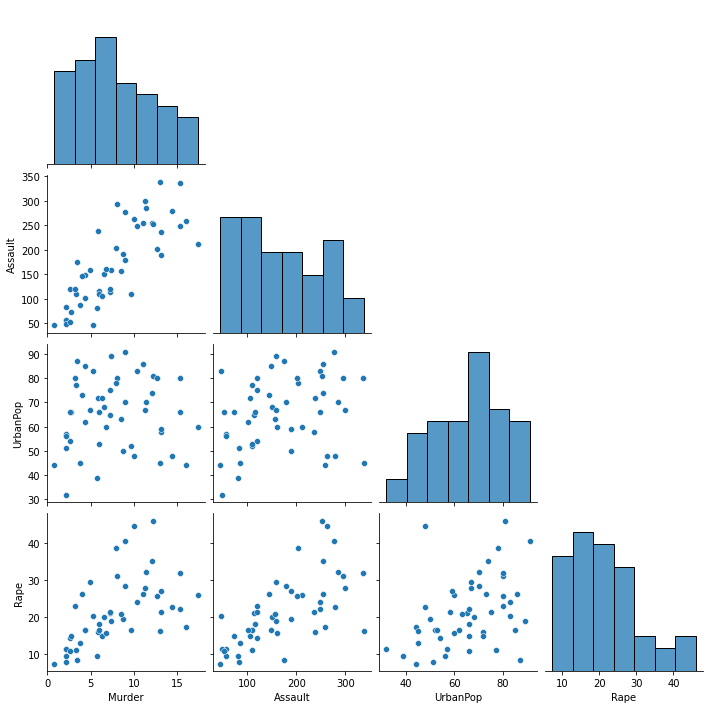

In [278]:
# Pairplot to decribe data relationships.
sns.pairplot(data=Arrest_df, corner=True)

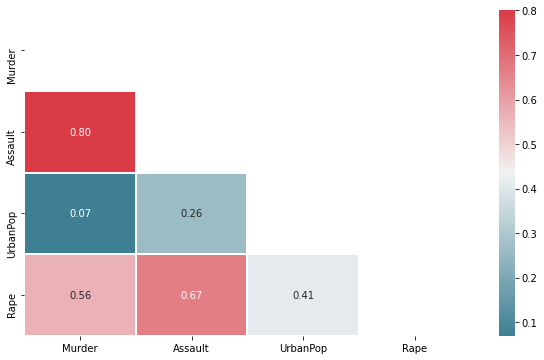

In [279]:
# Using the cool palatte of colors from sns... I love sns
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Get correlations
corrs = Arrest_df.corr()

# Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

In [297]:
# Scaling the data
Arrest_x = StandardScaler().fit_transform(Arrest_df.values)

# Pca with the specified 2 number of components.
Arrest_pca = PCA(n_components=4)

# creating components
Arrest_components = Arrest_pca.fit_transform(Arrest_x)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(Arrest_components, index=Arrest_df.index)

# This is to include the country code  as the rownames in the PC's
pca_df.head(50)

,0,1,2,3
City,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


In [282]:
# Checking the stats of the new pca dataframe
pca_stats = pca_df.describe()
pca_stats

,0,1
count,5.000000e+01,5.000000e+01
mean,-1.998401e-17,-3.330669e-17
std,1.590867e+00,1.004970e+00
min,-2.992226e+00,-1.570460e+00
25%,-1.117253e+00,-7.271390e-01
50%,-1.791618e-01,-1.534797e-01
75%,1.372968e+00,7.672871e-01
max,3.013042e+00,2.393796e+00


In [283]:
# Checking for correspondenece
pca_cor = pca_df.corr()
pca_cor

,0,1
0,1.000000e+00,8.325974e-17
1,8.325974e-17,1.000000e+00


Text(-1.7000000000000028, 0.5, 'PC2')

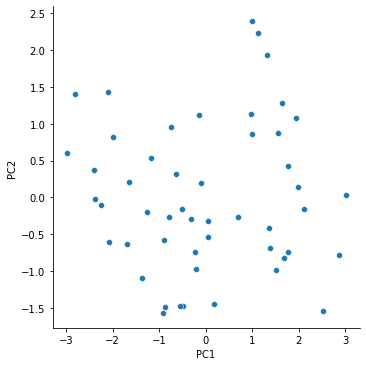

In [285]:
# THis relplot is a small description of the PC1 and PC2 relationship
sns.relplot(data=pca_df, x=0 , y=1)
plt.xlabel('PC1')
plt.ylabel('PC2')

<ipython-input-286-b37a574a2a7e>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(npca, variance, 'ro-', linewidth=2, color='y')


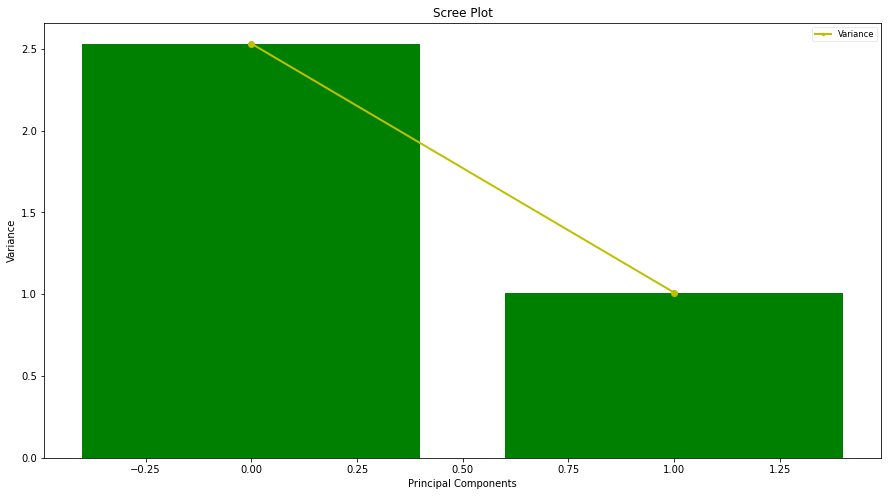

In [286]:
# THis really cool piece of code describes the pVE of our graph
npca = []
variance = []
for i in pca_stats:
    npca.append(i)
    variance.append(pca_stats[i]['std'] ** 2)
    
fig = plt.figure(figsize=(15,8))
plt.bar(npca, height = variance, color='g')
plt.plot(npca, variance, 'ro-', linewidth=2, color='y')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


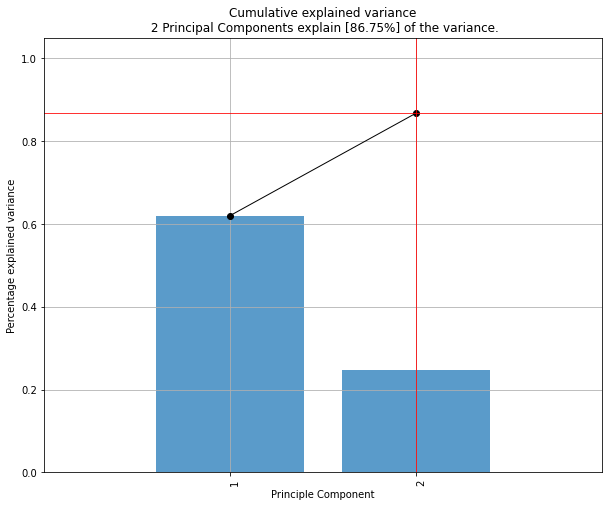

<Figure size 432x288 with 0 Axes>

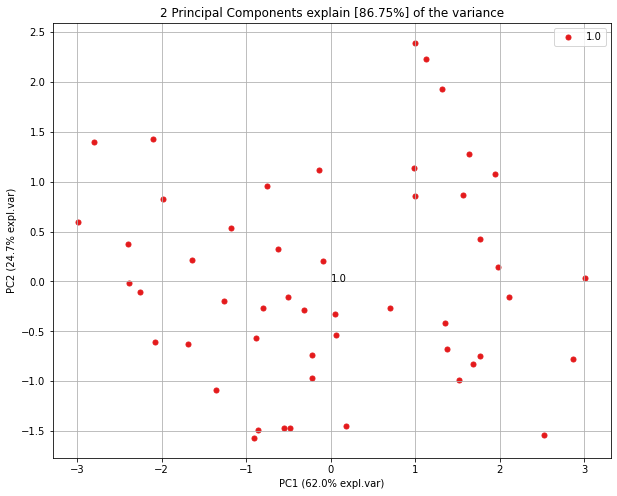

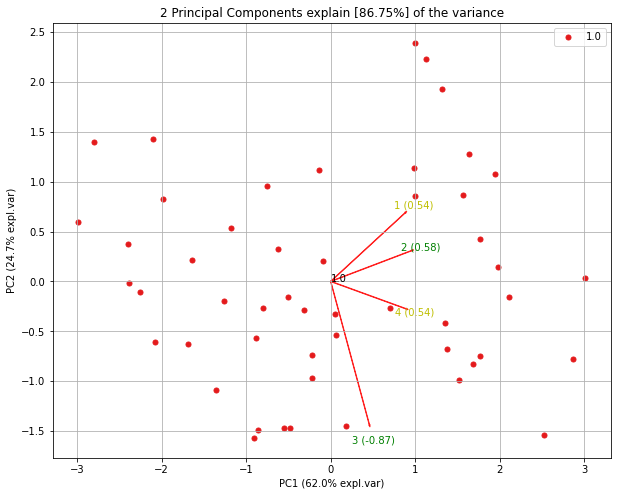

In [287]:
# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(Arrest_x)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4, )

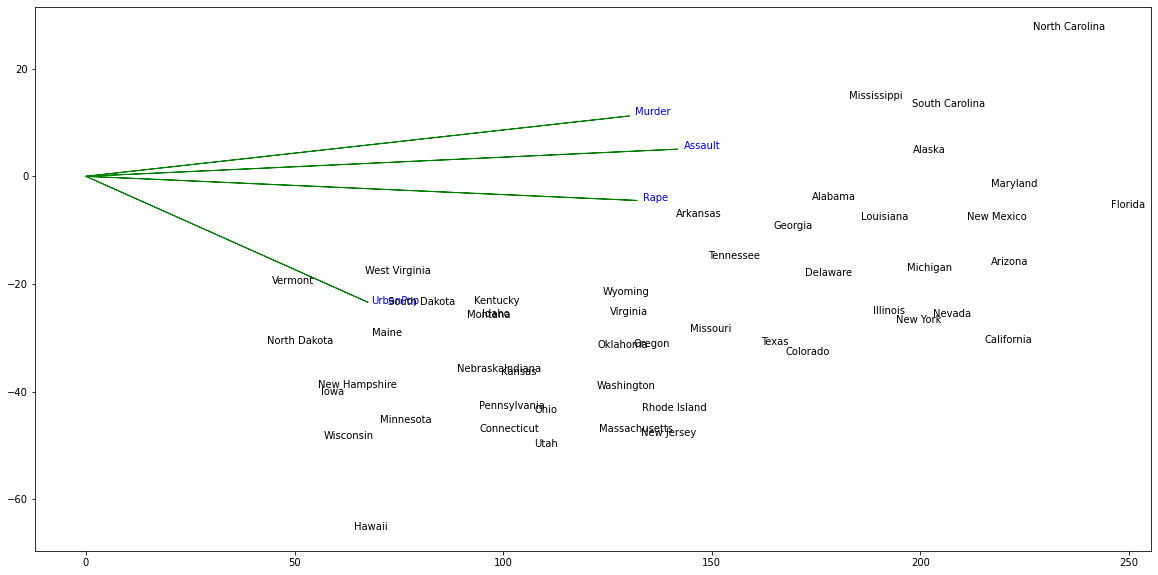

In [314]:
##this cool piece of code i found on github helps describe the biplot

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = Arrest_pca.components_[0]
yvector = Arrest_pca.components_[1]

xs = Arrest_pca.transform(Arrest_df)[:,0] 
ys = Arrest_pca.transform(Arrest_df)[:,1]

## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
fig = plt.figure(figsize=(20,10))
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='g', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.01, yvector[i]*max(ys)*1.01,
             list(Arrest_df.columns.values)[i], color='b')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'm')
    plt.text(xs[i]*1.01, ys[i]*1.01, list(Arrest_df.index)[i], color='black')

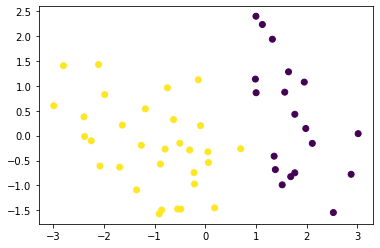

In [319]:
# hierachal clustering plot
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(pca_df)
plt.scatter(pca_df[0], pca_df[1], c=cluster.labels_)

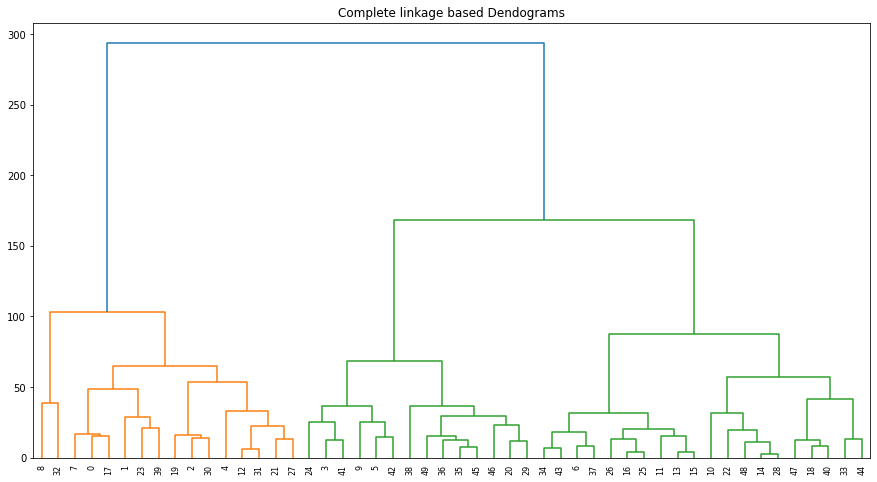

In [291]:
# THe dendrogram of complete linkage for the arrest data
fig = plt.figure(figsize=(15,8))
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(Arrest_df, method='complete'))

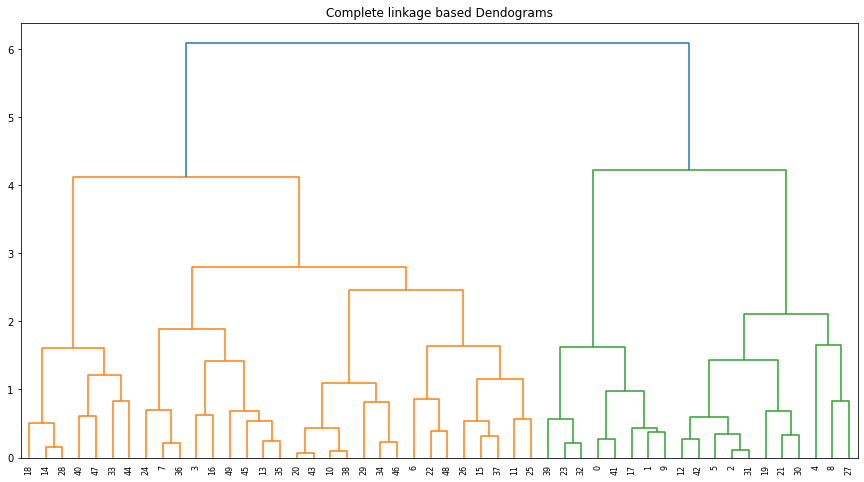

In [292]:
# The dendrogram of complete linkage for the pca data
fig = plt.figure(figsize=(15,8))
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(pca_df, method='complete'))  

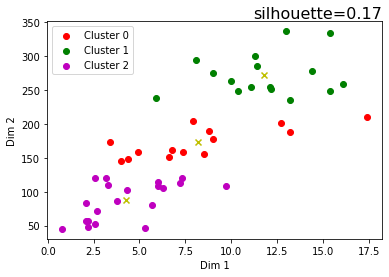

In [321]:
# THe kmeans clustering data code that makes a plot describing the clustered pca data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=123)
y_pred = kmeans.fit_predict(Arrest_df)
colours = 'rgm'
for c in range(3):
  plt.scatter(Arrest_df.iloc[y_pred == c, 0], Arrest_df.iloc[y_pred == c, 1], c = colours[c], label = 'Cluster {}'.format(c))
  plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'y')
score = round(silhouette_score(pca_df, kmeans.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend()